## 1.데이터 불러들이기

- 데이터 출처 : https://www.kaggle.com/chanoncharuchinda/top-100-korean-drama-mydramalist


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
kdrama=pd.read_csv('/content/drive/MyDrive/IntroBD/data/kdrama_5.0.csv')
kdrama

,Name,Number_of_Episode,Network,Duration,Main_Genre,Sub_Genre,Rating,Watchers
0,Move to Heaven,10,Netflix,52,Life,Family,9.2,25582
1,Hospital Playlist,12,"tvN, Netflix",90,Life,Friendship,9.1,50994
2,Flower of Evil,16,tvN,70,Thriller,Romance,9.1,53052
3,My Mister,16,tvN,77,Life,Psychological,9.1,40758
4,Prison Playbook,16,"tvN, Netflix",92,Life,Comedy,9.1,44601
5,It's Okay to Not Be Okay,16,"tvN, Netflix",75,Psychological,Romance,9.0,89510
6,Reply 1988,20,tvN,100,Youth,Romance,9.0,58711
7,Signal,16,tvN,75,Thriller,Mystery,9.0,53263
8,Navillera,12,"tvN, Netflix",65,Life,Family,9.0,20244
9,Mr. Queen,20,tvN,80,Historical,Comedy,9.0,35707


### 연관성 분석에 사용할 변수들

#### - `Network`과 `Rating`의 연관성
#### - `Network`과 `Watchers`의 연관성
#### - `Watchers`과 `Duration`의 연관성

## 2.`Network`과 `Rating`의 연관성

### Step 1 : 연구문제(research question)
: 한국드라마가 넷플릭스를 통해 유통되면 국외 시청자들에게 받는 Rating(평점)이 높아지는가?

### Step 2 : 가설

- 영가설 : Netflix 유통 여부와 Rating(평점)은 연관이 없다
- 대안가설 : Network에 Netflix가 포함되어 있다면 평점은 9.0 이상일 것이다.

Netflix를 포함한 그룹과 포함하지 않는 그룹이 Rating 9.0 이상 받을 확률을 각각 $p_{9.0+}와 p_{<9.0}$으로 표현하면, 가설을 다음과 같이 수식으로 표현할 수 있다.
$H_0:p_{9.0+}-p_{<9.0}=0$

$H_1:p_{9.0+}-p_{<9.0}>0$

### Step 3 : 데이터 탐색

- 관측단위 : Top-rated 한국 드라마 50개
- 설명변수 : `Network`에 Netflix 포함 여부
- 반응변수 : `Rating`이 9.0 이상인지 여부

In [110]:
kdrama['Netflix']=kdrama['Network'].str.contains('Netflix') #Network 열에서 Netflix를 포함하면 True, 아니면 False
kdrama['Netflix'] = kdrama['Netflix'].replace([True, False], ["O","X"])

In [111]:
kdrama['Rating9']=(kdrama['Rating']>=9.0) #Rating 열에서 9.0보다 크면 True, 아니면 False
kdrama['Rating9'] = kdrama['Rating9'].replace([True, False], ["9.0+","<9.0"])

In [112]:
kdrama

,Name,Number_of_Episode,Network,Duration,Main_Genre,Sub_Genre,Rating,Watchers,Netflix,Rating9
0,Move to Heaven,10,Netflix,52,Life,Family,9.2,25582,O,9.0+
1,Hospital Playlist,12,"tvN, Netflix",90,Life,Friendship,9.1,50994,O,9.0+
2,Flower of Evil,16,tvN,70,Thriller,Romance,9.1,53052,X,9.0+
3,My Mister,16,tvN,77,Life,Psychological,9.1,40758,X,9.0+
4,Prison Playbook,16,"tvN, Netflix",92,Life,Comedy,9.1,44601,O,9.0+
5,It's Okay to Not Be Okay,16,"tvN, Netflix",75,Psychological,Romance,9.0,89510,O,9.0+
6,Reply 1988,20,tvN,100,Youth,Romance,9.0,58711,X,9.0+
7,Signal,16,tvN,75,Thriller,Mystery,9.0,53263,X,9.0+
8,Navillera,12,"tvN, Netflix",65,Life,Family,9.0,20244,O,9.0+
9,Mr. Queen,20,tvN,80,Historical,Comedy,9.0,35707,X,9.0+


In [113]:
cross_tb=pd.crosstab(kdrama['Rating9'],kdrama['Netflix']) 
cross_tb

Netflix,O,X
Rating9,,
9.0+,7,7
<9.0,10,26


Network에 Netflix가 포함됐는지 여부를 나타내는 도수분포표

In [114]:
cross_tb.apply(lambda x : sum(x), axis = 0)

Netflix
O    17
X    33
dtype: int64

Netflix 그룹별 Rating 9.0 이상의 비율

In [115]:
prop = cross_tb.apply(lambda x : x/sum(x), axis = 0)
prop

Netflix,O,X
Rating9,,
9.0+,0.411765,0.212121
<9.0,0.588235,0.787879


Netflix(O)그룹과 Netflix(X)그룹의 Rating 9.0이상 비율 차이

In [116]:
# Netflix(O)그룹과 Netflix(X)그룹의 Rating 9.0이상 비율 차이
prop_diff = prop.iloc[0,0] - prop.iloc[0,1]
prop_diff

0.1996434937611408

Netflix(O)그룹과 Netflix(X)그룹의 Rating 9.0이상 비율의 비(상대위험도)

In [117]:
# Netflix(O)그룹과 Netflix(X)그룹의 Rating 9.0이상 비율의 비
prop_ratio = prop.iloc[0,0] / prop.iloc[0,1]
prop_ratio

1.941176470588235

=>Netflix를 통해 유통하는 그룹이 평점 9.0 이상일 비율이 Netflix를 통해 유통하지 않는 그룹의 비율보다 1.9배 더 높음을 의미

Rating9 각 그룹별 비율의 막대그래프

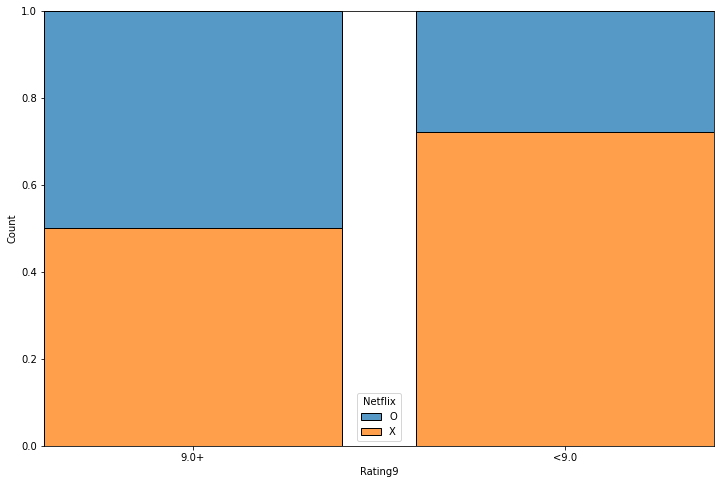

In [118]:
plt.figure(figsize=(12,8))
sns.histplot(data=kdrama,x='Rating9',multiple ='fill',hue='Netflix',shrink=0.8)

2차원 표와 막대그래프를 보면,Netflix가 포함된 그룹에서 Rating 9.0 이상 비율이 꽤 높음을 알 수 있다. 그룹 간 차이는 20%P (41.2%-21.2%=20%) 이다.

### Step 4 : 통계적추론

전략은 영가설이 맞다는 가정 하에서 관측 통계량만큼 극단적인 값이 나올 가능성을 모의실험(simulation)으로 구하는 것이다. 
통계량의 영분포(null distribution)를 구해서 관측통계량이 영분포의 꼬리에 있다면 영가설을 반대하는 강한 증거가 된다.
모의실험을 1000번 반복하여 두 그룹의 비율 차이 1000개를 구하고 히스토그램으로 그려본다. 모의실험을 많이 한 후에 나타나는 그래프는 영가설이 맞다는 가정 하에서 나타나는 영분포(null distribution)이다.


- Statistic : 두 그룹의 표본비율의 차($p_{9.0+}-p_{<9.0}$)

- Stimulate : 영가설이 맞다면 Network에 Netflix의 유무가 Rating에 미치는 영향은 없다. Netflix 유무로 나눠진 두 그룹간에 차이가 없는 경우에는, 'Netflix(O)' 그룹의 17개의 한국드라마와 'Netflix(O)' 33개의 한국드라마는 어느 그룹에 배치되었더라도 같은 결과를 얻었을 것이다. 이것이 맞다면 두 그룹간의 평점차이는 단순히 임의배치에서 나타나는 우연적인 결과일 뿐이다.

앞서 계산한 Rating9.0+비율의 차이를 obs_diff에 저장

In [119]:
obs_diff=prop_diff
obs_diff

0.1996434937611408

영가설 하에서 추정량인 Netflix(O)그룹과 Netflix(X)그룹에서 Rating>=9.0 비율의 차이의 분포 시뮬레이션(1회)

In [120]:
import random 
null_diff = []
kdrama_copy = kdrama.copy()
random.shuffle(kdrama_copy['Rating9'])
prop_table = pd.crosstab(kdrama_copy['Rating9'],kdrama_copy['Netflix'], normalize="columns")
prop_table

/usr/lib/python3.7/random.py:278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]


Netflix,O,X
Rating9,,
9.0+,0.294118,0.272727
<9.0,0.705882,0.727273


Bootstrap을 통한 모의실험 1000번

=>data 크기가 커서 shuffle함수를 그대로 이용하여 특정 변수를 섞어주면 계산시간이 많이 소요된다. 여기서는 계산량 경감을 위해 index를 나타내는 변수를 만들고 이를 shuffle함수를 이용하여 섞어서 변수값을 indexing 하는 방식으로 접근한다.

In [121]:
null_diff = []
kdrama_copy = kdrama.copy()
n = len(kdrama_copy['Rating9'])

# random.seed(18535)   # 실험의 재현성을 위함
idx = np.arange(0, n)   # index 변수

for i in range(1000) :
    # print(i)
    random.shuffle(idx)  # index 섞음
    kdrama_copy['Rating9']= kdrama_copy['Rating9'].iloc[idx].reset_index()['Rating9']  # 섞인 index에 따라 변수값 shuffle
    prop_table = pd.crosstab(kdrama_copy['Rating9'],kdrama_copy['Netflix'], normalize="columns") # 열 기준 비율에 대한 2*2 분할표
    prop_c = prop_table.iloc[0,0] #Netflix를 통해 유통한 경우 Rating이 9.0이상 나온 비율
    prop_d = prop_table.iloc[0,1] #Netflix를 통해 유통하지 않아도 Rating이 9.0이상 나온 비율
    res = prop_c - prop_d # 비율의 차이
    null_diff.append(res)

- Strength of evidence 
: 유의성 관련 설명과 유의확률 기술, 신뢰구간 등(해석)

표본비율차이의 관측통계량은 0.2이다. 이 관측통계량이 영분포에서 나타나기 어려운 극단적인 값인지 알기 위해 영가설 하에서 시뮬레이션하여 구한 Rating>=9.0비율 차이의 분포를 이용하여 유의확률 계산

(*유의 확률 : Netflix(O)그룹과 Netflix(X)그룹의 Rating>=9.0비율 차이가 영가설하 분포인 기존 데이터에서 관측된 차이값보다 클 확률을 구함)

(*대안가설이 두 그룹의 비율이 0보다 크다이므로 유의확률은 한쪽)

In [122]:
get_p_value = sum(null_diff >= obs_diff) / 1000
get_p_value

0.106

1,000번 실행하면 p-value 값은 약 0.118이다. 이는 유의수준 0.05보다 크기때문에 영가설을 채택하는 강한 증거이다.

영가설 하에서 1000번 실행한 표본비율의 차이 히스토그램

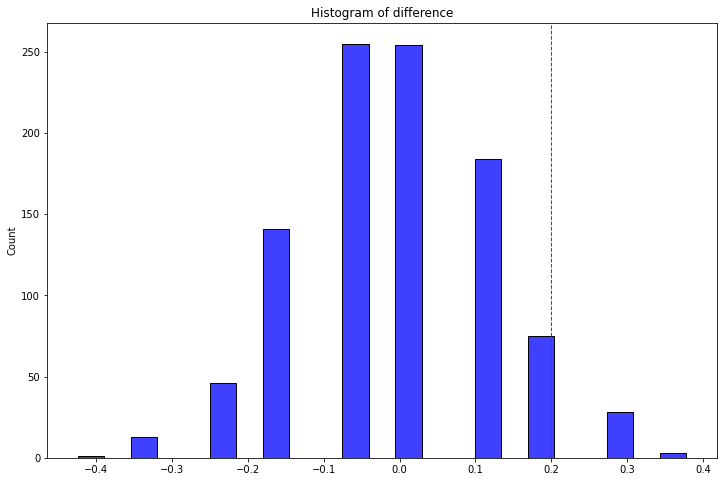

In [123]:
# 영가설 하에서 표본비율의 차이 히스토그램
fig = plt.figure(figsize=(12,8))
sns.histplot(null_diff, color="blue")
plt.axvline(obs_diff, color='red', linestyle='dashed', linewidth=1)
plt.title('Histogram of difference')
plt.show()

Netflix(O) 그룹과 Netflix(X) 그룹의 Rating>=9.0 비율의 차이에 대한 95% 신뢰구간 (Bootstrap 이용)

In [124]:
# 두 비율의 차이를 계산해 주는 함수 정의

def prop_diff(df):
    t_table = pd.crosstab(df.iloc[:,8],df.iloc[:,9], normalize="columns") #(8:Netflix,9:Rating9) columns
    prop_c = t_table.iloc[0,0] 
    prop_d = t_table.iloc[0,1]  
    res = prop_c - prop_d
    
    return res

In [125]:
# np.random.seed(18535)

rep=1000     # Bootstrap 반복수 설정

ind = range(n)
bs_replicates = []

for i in range(rep):
    # print(i)
    # 주어진 자료로부터  임의 복원 추출한 표본(주어진 데이터와 크기 동일)의 index 번호
    randomRows = np.random.choice(ind, size=n)    
    bs_sample = kdrama.iloc[randomRows, :]                # 추출된 표본(bootstrap sample)
    bs_replicates.append(prop_diff(bs_sample))             # 추출된 표본에서의 비율차이
    
# bs_replicates      # 1000번 반복하여 계산된 비율 차이

In [126]:
BCI_95 = np.percentile(bs_replicates,[2.5,97.5])
print('Bootstrap 95% 신뢰구간:', BCI_95)    # 95% Bootstrap confidence intercal (percentile 방법)

Bootstrap 95% 신뢰구간: [-0.09485095  0.53022523]


Netflix를 통해 유통될 때가 Netflix를 통해 유통되지 않을 때보다 Rating>=9.0이 될 비율이 최소 0.089 작아지거나 최대 0.536 만큼 높아진다.

### Step 5 & 6 : 결론 및 연구의 한계 등 기술

데이터를 처음 요약했을 때 한국드라마가 Netflix를 통해 유통될 때와 그렇지 않았을 때 평점 9.0이상 받는 비율의 차이는 0.2 이었다. 이 값이 얼마나 큰가를 판단하기 위하여 영분포를 모의실험으로 만들어 p-value를 구하였다. p-value값은 0.119로 신뢰도 95%에서 유의수준 0.05보다 크기 때문에, 두 그룹 사이의 Rating>=9.0 비율 차이가 통계적으로 유의하지 않음을 보인다. 하지만 Bootstrap을 통해 구한 95% 신뢰구간에서 (-0.089, 0.536)이라는 범위는 실질적으로 Netflix를 통해 유통하는것이 약간이나마 9.0이상의 평점을 받는데 도움이 될 수 있음을 의미한다.

한국드라마를 두 그릅으로 랜덤하게 배치했기 때문에, 평점 분포를 설명하는 다른 변수는 없다. 이것으로 Network에서 Netflix 유무가 9.0 이상의 Rating을 받게하는 원인이 어느정도는 맞다고 결론내릴 수 있다.

이 연구 결과의 한계는 50개의 한국드라마가 랜덤추출에서 얻은 표본이라고 간주할만한 어떤 증거도 갖고 있지 않기 때문에 좀더 큰 모집단으로 일반화 할 수 없다.

## 3.`Network`와 `Watchers`의 연관성

### Step 1 : 연구문제(research question)
: Netflix를 통해 한국드라마가 유통되면 시청자 수가 증가하는가?

### Step 2 : 가설

- 영가설 : 시청자 수는 Netflix 유무에 영향을 받지 않는다.
- 대안가설 : 시청자 수는 Netflix 유무에 영향을 받는다.

Netflix를 통해 유통하는 한국드라마의 시청자 수 모평균을 $u_{Netflix(O)}$, Netflix를 통해 유통되지 않는 한국드라마의 시청자 수 모평균을 $u_{Netflix(X)}$라고 하면, 가설을 다음과 같이 나타낼 수 있다.

$H_0 : u_{Netflix(O)} - u_{Netflix(X)} = 0$

$H_0 : u_{Netflix(O)} - u_{Netflix(X)} ≠ 0$

### Step 3 : 데이터 탐색

- 관측단위 : Top-rated 한국 드라마 50개
- 설명변수 : `Network`에 Netflix 포함 여부
- 반응변수 : `Watchers`(시청자 수)

In [127]:
kdrama=pd.read_csv('/content/drive/MyDrive/IntroBD/data/kdrama_5.0.csv')
kdrama['Netflix']=kdrama['Network'].str.contains('Netflix') #Network 열에서 Netflix를 포함하면 True, 아니면 False
kdrama['Netflix'] = kdrama['Netflix'].replace([True, False], ["O","X"])
kdrama_NW=kdrama[['Netflix','Watchers']]
kdrama_NW.head()

,Netflix,Watchers
0,O,25582
1,O,50994
2,X,53052
3,X,40758
4,O,44601


In [128]:
# 'Netflix' 그룹별 Watchers 변수의 five number와 평균, 표준편차 
kdrama_NW.groupby(kdrama_NW.Netflix).describe()['Watchers']

,count,mean,std,min,25%,50%,75%,max
Netflix,,,,,,,,
O,17.0,38455.882353,23096.181564,13368.0,20753.0,36261.0,44601.0,90973.0
X,33.0,47830.818182,36703.951321,9235.0,20768.0,30682.0,58711.0,136290.0


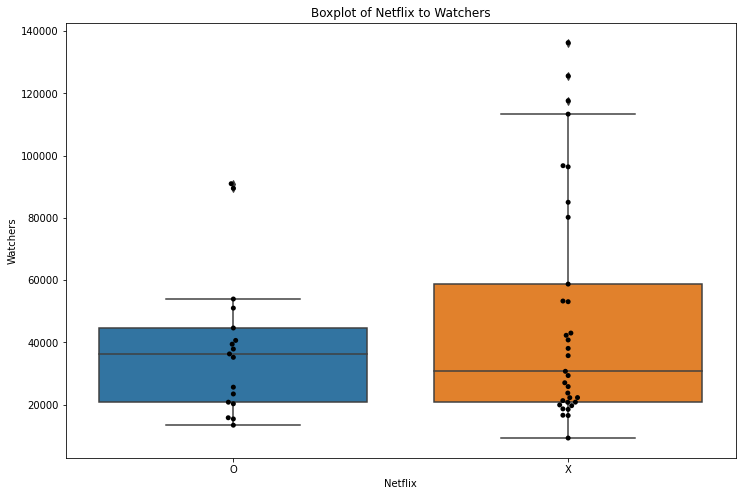

In [129]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Netflix",y="Watchers",data=kdrama_NW)
sns.swarmplot(x="Netflix",y="Watchers",color="black",data=kdrama_NW)
plt.title("Boxplot of Netflix to Watchers")
plt.show()

상자그림과 수치 요약에서 보는 것처럼, 오히려 Netflix를 통해 유통되지 않을 때 시청자 수의 평균과 표준편차가 Netflix를 통해 유통될 때 보다 더 크다. 

즉, Netflix를 통해 유통되지 않을 때 시청자 수가 좀 더 많거나 변동이 더 큰 경향이 있다.

### Step 4 : 통계적추론

- Statistic : 두 그룹의 표본평균의 차($u_{Netflix(O)} - u_{Netflix(X)}$)

- Stimulate : 평균 시청자 수의 차이는 Netflix 유무에 의해 나타난 결과일까? 모의실험을 하기 위하여 Network에 Netflix를 포함(=Netflix(O))하는 17장의 카드, 이외의 Network들(=Netflix(X))를 의미하는 33장의 카드를 준비하자. 시청자 수는 숫자이므로 17장의 카드에는 Netflix(O)의 데이터를 기록하고 나머지 30장의 카드에는 Netflix(X)의 데이터를 기록한다. 시청자 수는 Netflix 유무와 무관하다는 것이 영가설이다. 영가설에서 나타날 수 있는 데이터를 모의실험으로 만들어보자. 50장의 카드를 잘 섞은 후에 17장의 카드와 33장의 카드로 나눈다. 17장의 카드 데이터는 Netflix(O), 33장의 카드 데이터는 Netflix(X)의 데이터로 간주한다. 이는 Netflix 유무에 따른 평균 시청자 수 차이가 없다는 가정 하에서 나올 수 있는 데이터이다. 각 집단 평균의 차이를 구하고 히스토그램에 표시한다. 1000번 반복하면서 평균 차이가 어떤 값인지 관찰한다.

위에 설명된 방법을 앞 장에서와 같이 shuffle 함수를 이용하여 다음과 같이 모의실험을 간단히 실행할 수 있다.

In [130]:
res_mean = kdrama_NW.groupby(kdrama_NW.Netflix).mean()['Watchers']
res_mean

Netflix
O    38455.882353
X    47830.818182
Name: Watchers, dtype: float64

In [131]:
res_mean.iloc[0] - res_mean.iloc[1]

-9374.935828877009

In [132]:
obs_diff=res_mean.iloc[0] - res_mean.iloc[1]

In [133]:
import random 
    
null_diff = []
kdrama_NW_copy = kdrama_NW.copy()
n = len(kdrama_NW_copy)

# random.seed(18535)   # 실험의 재현성을 위함
idx = np.arange(0, n)

for i in range(1000) :
    # print(i)
    random.shuffle(idx)
    kdrama_NW_copy['Netflix'] = kdrama_NW_copy['Netflix'].iloc[idx].reset_index()['Netflix']
    res_mean = kdrama_NW_copy.groupby(kdrama_NW_copy.Netflix).mean()
    res_diff = res_mean.iloc[0,0] - res_mean.iloc[1,0]
    null_diff.append(res_diff)

In [134]:
res_mean = kdrama_NW_copy.groupby(kdrama_NW_copy.Netflix).mean()
res_mean

,Watchers
Netflix,
O,43898.588235
X,45027.000000


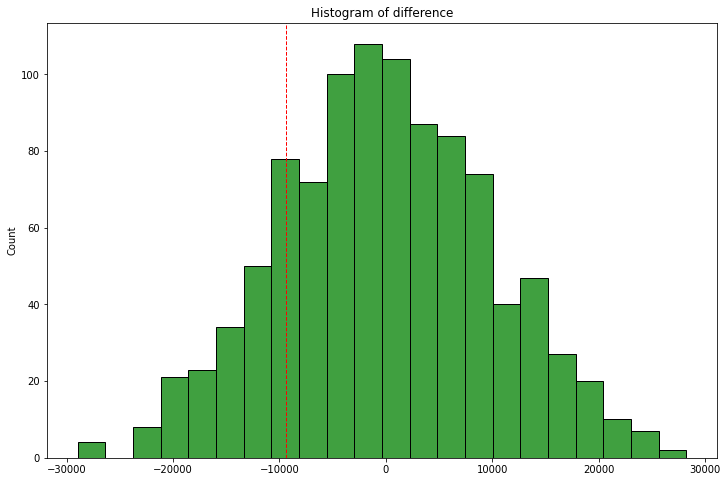

In [135]:
fig = plt.figure(figsize=(12,8))
sns.histplot(null_diff, color="green")
plt.axvline(obs_diff, color='red', linestyle='dashed', linewidth=1)
plt.title('Histogram of difference')
plt.show()

=>영가설이 맞다면 평균 차는 0을 중심으로 대칭적으로 퍼져 있어야 하는데, 얼핏 보기에 그래보인다.

- Strength of evidence : 유의성 관련 설명과 유의확률 기술, 신뢰구간 등(해석)

유의확률(p-value) , 대안가설에 따라 양측으로 계산

In [136]:
# 유의확률(p-value) , 대안가설에 따라 양측으로 계산
get_p_value = sum(np.abs(null_diff)>np.abs(obs_diff)) / 1000
get_p_value

0.35

p-value 0.339는 영가설을 반대하는 증거로 매우 약하다. 
평균 시청자수 차이 관측통계량값 9374보다 크거나 작은 값은 영가설 하에서 관측하기 어려운 값이 전혀 아니다. 따라서 Network에 Netflix 유무로 시청자 수의 평균이 다르다는 뚜렷한 증거는 없다.

만약 p-value가 0.1이라면 어떤가? 그러면 Netflix 유무는 시청자 수에 어떤 영향도 끼치지 않는다는 것이 증명된 것인가? 

이는 시청자 수에 Netflix 유무의 영향이 조금 있지만 이 연구로는 찾아내지 못한 것일 수도 있다.

유의성 검증 후에 자연스럽게 나오는 질문은 모수의 크기에 관한 것이다. 신뢰구간을 구하여 모수가 어느 범위에 있는 지 알아보자.


In [137]:
# np.random.seed(18535)

rep=1000     # Bootstrap 반복수 설정
n = len(kdrama_NW)

ind = range(n)
bs_replicates = []

for i in range(rep):
    # 주어진 자료로부터 임의 복원 추출한 표본(주어진 데이터와 크기 동일)의 index 번호
    randomRows = np.random.choice(ind, size=n)    
    bs_sample = kdrama_NW.iloc[randomRows, :]                # 추출된 표본
    res_mean = bs_sample.groupby(bs_sample.Netflix).mean() # 각 그룹별 평균계산
    res_diff = res_mean.iloc[0,0] - res_mean.iloc[1,0]   # 추출된 표본에서의 평균차이
    bs_replicates.append(res_diff)             
    
# bs_replicates      # 1000번 반복하여 계산된 평균 차이

In [138]:
print('Bootstrap 95% 신뢰구간:', np.percentile(bs_replicates,[2.5,97.5]) ) # 95% Bootstrap confidence intercal (percentile 방법)

Bootstrap 95% 신뢰구간: [-24992.62304471   7298.59650735]


95% 신뢰수준에서 Netflix를 통해 유통하는 드라마가 Netflix를 통해 유통하지 않는 드라마보다 시청자 수가 평균적으로 25236명 적을 수도 있고 6713명 많을 수도 있음을 의미한다. 

### Step 5 & 6 : 결론 및 연구의 한계 등 기술

데이터를 처음 요약했을 때,한국드라마가 Netflix를 통해 유통되지 않았을 때와 유통될 때 평균 시청자 수 차이는 9357명 이었다. 이 값이 얼마나 큰가를 판단하기 위하여 영분포를 모의실험으로 만들어 p-value를 구하였다. p-value값은 0.339로 유의수준 0.05보다 훨씬 크기 때문에, 두 그룹 사이의 평균 시청자 수 차이가 통계적으로 유의하지 않음을 보인다. 이와 달리 Bootstrap을 통해 구한 95% 신뢰구간에서 (-25236, 6713)이라는 범위는, 드라마를 Netflix를 통해 유통하는 것이 오히려 평균 시청자 수 감소의 원인이 될 수 있음을 의미한다. 하지만 Network에 Netflix를 포함한 17개의 kdrama를 살펴보면, Netflix가 자체 제작해 유통하는 경우는 단 3개밖에 없고 대부분의 드라마는 한국 방송사들이 제작해 Netflix에 추가적으로 유통하는 구조이다. 따라서 Netflix가 시청자 수 감소를 야기한다고 해석하긴 어렵다. 

즉, 'Netflix를 통해 드라마를 추가 유통하는 것은 시청자 수 평균에 큰 영향을 주지 않는다'고 최종 해석할 수 있다.

한국드라마를 두 그릅으로 랜덤하게 배치했기 때문에, 평균 시청자 수의 분포를 설명하는 다른 변수는 없다. 이것으로 Network에서 Netflix 유무가 Watchers의 평균에 영향을 끼치는 원인이 아니라는게 맞다고 볼 수 있다.

이 연구 결과의 한계는 설계 자체에 있어 심각한 약점이 있다는 것이다. 어렵겠지만 세계 각국의 문화 차이, 국외에서 한국드라마가 호평받는 장르, 드라마 속 유명 배우들의 캐스팅 여부 등 다른 요인들을 고려한 시청자 수 연구가 필요하다.

## 4.`Duration`과 `Watchers`의 연관성 (상관분석과 선형회귀분석 동시에 시행)

### Step 1 : 연구문제(research question)
: `Duration(한 회 길이)`가 길수록 `Watchers(시청자 수)`는 줄어드는가?

### Step 2 : 가설
In 상관분석
- 영가설 : 한국드라마의 한 회 길이와 시청자 수 사이에는 상관관계가 없다.
- 대안가설 : 한국드라마의 한 회 길이와 시청자 수 사이에는 상관관계가 있다.

In 선형회귀분석
- 영가설 : 한국드라마의 한 회 길이와 시청자 수 사이에는 선형관계가 없다.
- 대안가설 : 한국드라마의 한 회 길이와 시청자 수 사이에는 선형관계가 있다.

### Step 3 : 데이터 탐색

- 관측단위 : Top-rated 한국 드라마 50개
- 설명변수 : `Duration(한 회 길이)`
- 반응변수 : `Watchers(시청자 수)`

In [139]:
kdrama=pd.read_csv('/content/drive/MyDrive/IntroBD/data/kdrama_5.0.csv')
kdrama_DW=kdrama[['Duration','Watchers']]
kdrama_DW.describe()

,Duration,Watchers
count,50.000000,50.000000
mean,69.420000,44643.340000
std,13.321902,32773.439445
min,30.000000,9235.000000
25%,62.250000,20756.750000
50%,70.000000,35442.000000
75%,79.250000,53210.250000
max,100.000000,136290.000000


- 산점도

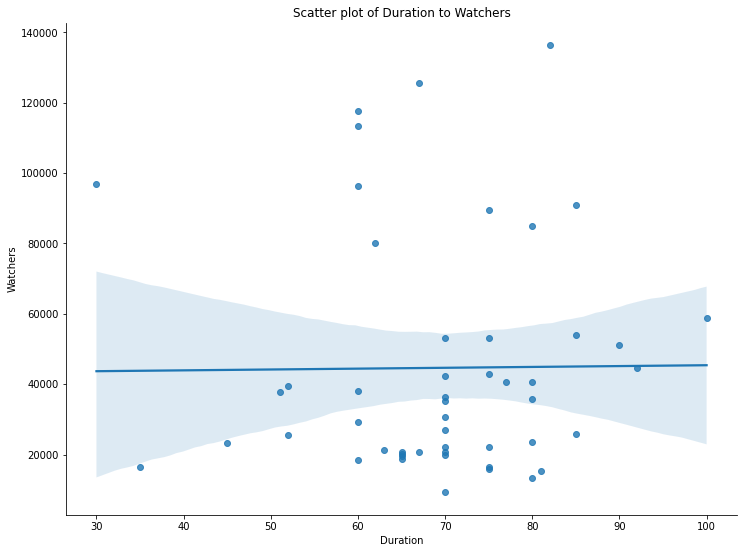

In [140]:
snsplot = sns.lmplot(x='Duration',y='Watchers',data=kdrama_DW,)
snsplot.fig.set_size_inches(12,8)
plt.xlabel('Duration')
plt.ylabel('Watchers')
plt.title('Scatter plot of Duration to Watchers')
plt.show()

- x에 log scale 사용한 산점도

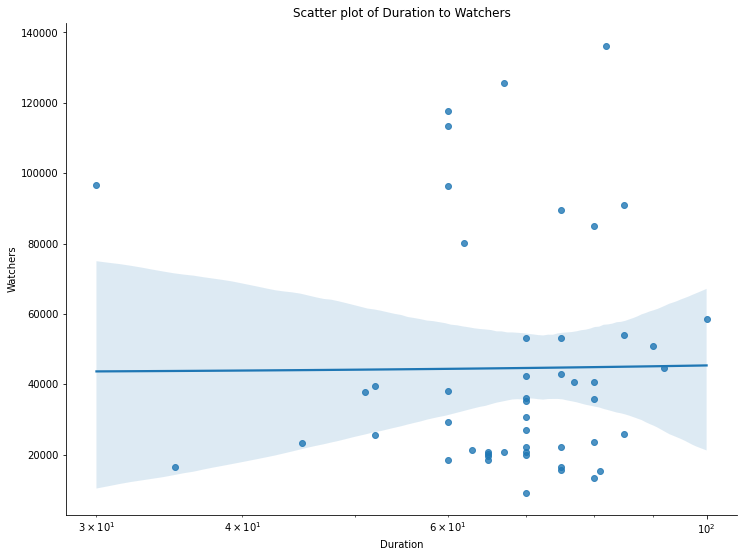

In [141]:
# 산점도, x에 log scale 사용
snsplot = sns.lmplot(x='Duration',y='Watchers',data=kdrama_DW)
snsplot.fig.set_size_inches(12,8)
snsplot.set(xscale='log')
plt.xlabel('Duration')
plt.ylabel('Watchers')
plt.title('Scatter plot of Duration to Watchers')
plt.show()

- y에 log scale 사용한 산점도

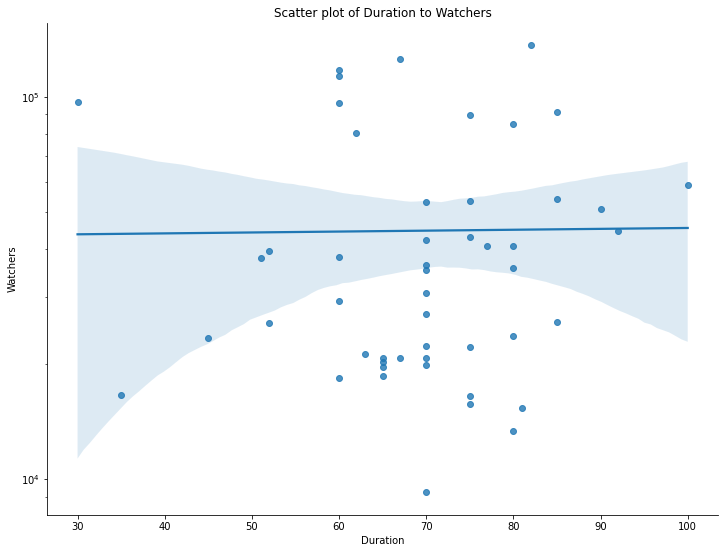

In [142]:
# 산점도, y에 log scale 사용
snsplot = sns.lmplot(x='Duration',y='Watchers',data=kdrama_DW)
snsplot.fig.set_size_inches(12,8)
snsplot.set(yscale='log')
plt.xlabel('Duration')
plt.ylabel('Watchers')
plt.title('Scatter plot of Duration to Watchers')
plt.show()

- x,y 모두에 log scale 사용한 산점도

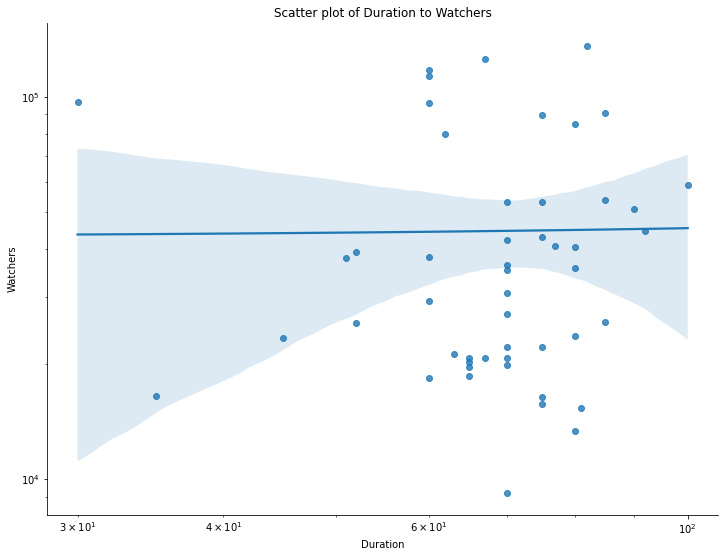

In [143]:
# 산점도, x,y에 log scale 사용
snsplot = sns.lmplot(x='Duration',y='Watchers',data=kdrama_DW)
snsplot.fig.set_size_inches(12,8)
snsplot.set(xscale='log',yscale='log')
plt.xlabel('Duration')
plt.ylabel('Watchers')
plt.title('Scatter plot of Duration to Watchers')
plt.show()

**각 변수에 log를 취했을 때 y>(x,y)>x순으로 산점도의 선형관계가 강해보인다.**

In [144]:
kdrama_DW=kdrama_DW.astype(float)
#np.log(kdrama_DW['Duration'])

In [145]:
# 상관계수
np.corrcoef(kdrama_DW['Duration'],kdrama_DW['Watchers'])[0,1]

0.009860221812699653

In [146]:
# x,y 모두에 Log 취한 후 상관계수 구하기
np.corrcoef(np.log(kdrama_DW['Duration']),np.log(kdrama_DW['Watchers']))[0,1]

0.02258125077509933

In [147]:
# x에 Log 취한 후 상관계수 구하기
np.corrcoef(np.log(kdrama_DW['Duration']),kdrama_DW['Watchers'])[0,1]

-0.01965566743705671

In [148]:
# y에 Log 취한 후 상관계수 구하기
np.corrcoef(kdrama_DW['Duration'],np.log(kdrama_DW['Watchers']))[0,1]

0.057701620982449665

그나마 log를 취해서 상관계수가 높은값이 0.05이다. 

그런데 그래프를 계속 보면, Duration이 30인데 시청자 수가 100,000인 이상점이 하나 보인다.

이상점까지 제거하고 y에 로그를 취한 데이터에서 두 변수 간 상관계수를 구해봤다.

In [149]:
kdrama_DW.iloc[33,:]

Duration       30.0
Watchers    96757.0
Name: 33, dtype: float64

In [150]:
kdrama_DW_copy=kdrama_DW.copy()
kdrama_DW_copy=kdrama_DW_copy.drop(33, axis = 'rows') #Duration 30, Watchers 96757인 행 제거

In [151]:
np.corrcoef(kdrama_DW_copy['Duration'],np.log(kdrama_DW_copy['Watchers']))[0,1]

0.17014310841536623

약하지만 그래도 양의 상관관계를 발견했다.

(33행을 데이터에서 제거하니 선형관계에 대한 인식이 바뀌었으므로, 이 33행 값을 '영향관측값'이라고 볼 수 있다.)


이상점을 제거한 데이터의 y값에 log를 취해 다시 그래프를 그려봤다.

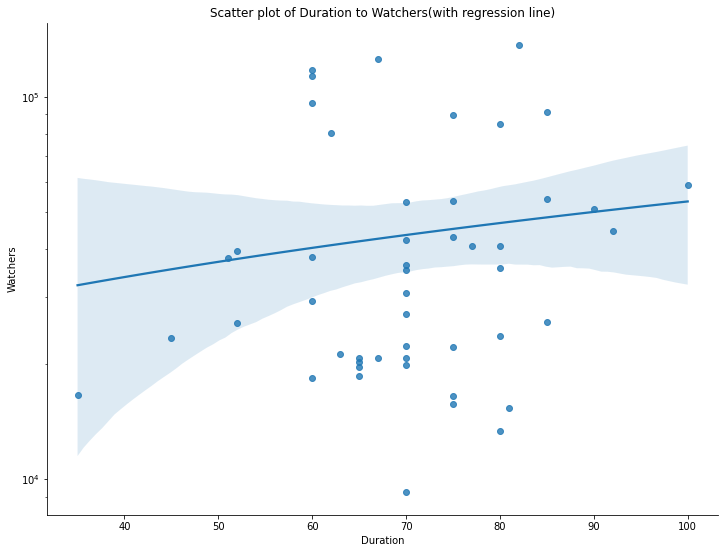

In [152]:
snsplot = sns.lmplot(x='Duration',y='Watchers',data=kdrama_DW_copy,fit_reg=True)
snsplot.fig.set_size_inches(12,8)
snsplot.set(yscale='log')
plt.xlabel('Duration')
plt.ylabel('Watchers')
plt.title('Scatter plot of Duration to Watchers(with regression line)')
plt.show()

회귀직선의 선형관계도 확실히 뚜렷해졌다.

- 최소제곱 기준을 만족하는 최적 적합선을 찾는 ols 함수 적용

In [153]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [154]:
kdrama_DW_copy

,Duration,Watchers
0,52.0,25582.0
1,90.0,50994.0
2,70.0,53052.0
3,77.0,40758.0
4,92.0,44601.0
5,75.0,89510.0
6,100.0,58711.0
7,75.0,53263.0
8,65.0,20244.0
9,80.0,35707.0


In [155]:
kdrama_DW_copy['Watchers'] = np.log1p(kdrama["Watchers"]) #데이터에 직접 Watchers 로그화

In [156]:
model = smf.ols(formula = 'Watchers ~ Duration', data = kdrama_DW_copy)
result = model.fit()
result.params  # 적합된 직선의 기울기 및 절편

Intercept    9.811922
Duration     0.009200
dtype: float64

최적 적합선 : $\hat{y}$=9.81 + 0.009x

In [157]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Watchers   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.401
Date:                Tue, 21 Dec 2021   Prob (F-statistic):              0.242
Time:                        05:50:42   Log-Likelihood:                -47.803
No. Observations:                  49   AIC:                             99.61
Df Residuals:                      47   BIC:                             103.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8119      0.554     17.718      0.000       8.698      10.926
Duration       0.0092      0.008      1.184      0.242      -0.006       0.025
==============================================================================
Omnibus:                        1.969   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.374   Jarque-Bera (JB):                1.902
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.600   Cond. No.                         422.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

결정계수

In [158]:
result.rsquared

0.02894866328678536

시청자 수(Watchers)의 총 변동 중에서 2.8%는 드라마 한 회 길이(Duration)를 아는 것으로 설명된다. 

이는 매우 작은수치로 두 변수의 관계를 설명하기 어렵다.

### Step 4 : 통계적추론

#### 1.상관계수

- Statistic : 관심있는 통계량은 Duration과 Watchers 사이의 표본상관계수로 이 연구에서는 r=0.170이다.
- Stimulate :  '모 집단에서 한국드라마의 한 회 길이와 시청자 수 사이에는 상관관계가 없다'라는 영가설이 맞다고 가정하자. 영가설이 맞다면 드라마 한 회 길이와 시청자 수를 아무렇게나 짝지어도 무방하다. 그러므로 반응변수인 드라마 한 회 길이를 무작위로 섞어서 시청자 수와 짝을 지은 후에 표본상관계수를 계산한다. 이런 작업을 많이 반복한 후에 얻어진 히스토그램이 표본상관계수의 영분포(null distribution)가 된다

영가설 하에서 1,000번 반복하여 히스토그램을 만든다. 

이 히스토그램이 영가설이 맞다고 가정했을 때 모의실험으로 만든 상관계수의 영분포이다.

In [159]:
obs_corr=np.corrcoef(kdrama_DW_copy['Duration'],np.log(kdrama_DW_copy['Watchers']))[0,1]

In [160]:
kdrama_DW_copy_corr=kdrama_DW_copy.copy().reset_index(drop=True) #기존 kdrama_DW_copy 사용 시 index 오류로 먼저 인덱스 새로 만든 데이터 생성

In [161]:
# 영가설 하에서 1,000번 반복하여 히스토그램을 만든다. 
# 이 히스토그램이 영가설이 맞다고 가정했을 때 모의실험으로 만든 상관계수의 영분포이다.
random.seed(18535)

null_corr = []

for i in range(1000) :
    random.shuffle(kdrama_DW_copy_corr['Duration'])
    res_corr = np.corrcoef(kdrama_DW_copy_corr['Watchers'],kdrama_DW_copy_corr['Duration'])[0,1]
    null_corr.append(res_corr)

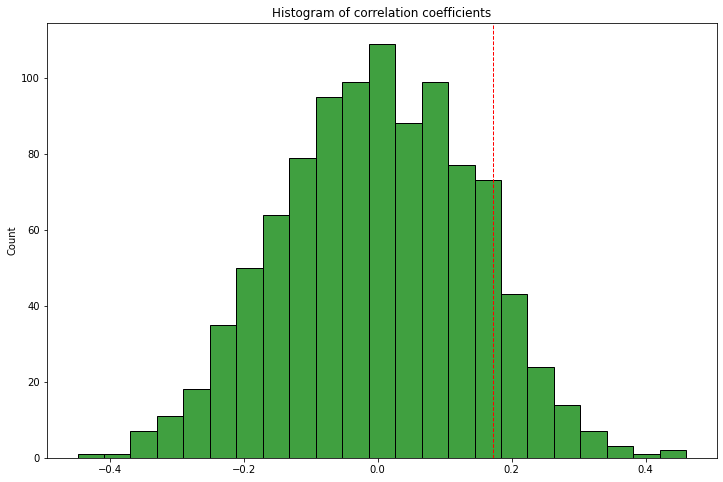

In [162]:
fig = plt.figure(figsize=(12,8))
sns.histplot(null_corr, color="green")
plt.axvline(obs_corr, color='red', linestyle='dashed', linewidth=1)
plt.title('Histogram of correlation coefficients')
plt.show()

In [163]:
# 유의확률(p-value) , 대안가설에 따라 direction='two_sided'
get_p_value = sum(np.abs(null_corr)>np.abs(obs_corr)) / 1000
get_p_value

0.238

- Strength of evidence : 유의성 관련 설명과 유의확률 기술, 신뢰구간 등(해석)

표본에서 계산한 상관계수의 값은 0.170다. 영분포에서 0.170이나 -0.170보다 더 극단으로 나올 확률, 즉 위 히스토그램에서 양쪽 면적을 구하여 p-value를 구하면 대략 0.238이 나온다. 

p-value 0.238은 영가설을 반대하는 증거로 매우 약하다.

#### 2.회귀선의 기울기

- Statistic : 관심있는 통계량은 Duration과 Watchers 사이의 회귀직선의 기울기로 이 연구에서는 0.009이다.
- Stimulate :  '모 집단에서 한국드라마의 한 회 길이와 시청자 수 사이에는 선형관계가 없다'라는 영가설이 맞다고 가정하자. 영가설이 맞다면 드라마 한 회 길이와 시청자 수를 아무렇게나 짝지어도 무방하다. 그러므로 반응변수인 드라마 한 회 길이를 무작위로 섞어서 시청자 수와 짝을 지은 후에 표본상관계수를 계산한다. 이런 작업을 많이 반복한 후에 얻어진 히스토그램이 표본상관계수의 영분포(null distribution)가 된다

In [164]:
model = smf.ols(formula = 'Watchers ~ Duration', data = kdrama_DW_copy)
result = model.fit()
obs_slope = result.params[1]
print('기울기 추정치 :', obs_slope)

기울기 추정치 : 0.009200077489664194


In [165]:
# 영가설 하에서 1,000번 반복하여 히스토그램을 만든다. 
# 이 히스토그램이 영가설이 맞다고 가정했을 때 모의실험으로 만든 기울기의 영분포이다.

import random

# random.seed(18535)
kdrama_DW_copy_reg = kdrama_DW_copy.copy().reset_index(drop=True)
n = len(kdrama_DW_copy_reg)
idx = np.arange(0, n)

null_slope = []

for i in range(1000) :
    # print(i)
    random.shuffle(idx)
    kdrama_DW_copy_reg['Watchers'] = kdrama_DW_copy_reg['Watchers'].iloc[idx].reset_index()['Watchers']
    res_model = smf.ols(formula = 'Watchers ~ Duration', data = kdrama_DW_copy_reg)  # bootstrap 표본에서의 회귀직선 적합
    res_result = res_model.fit()
    res_slope = res_result.params[1]  # 기울기
    null_slope.append(res_slope)

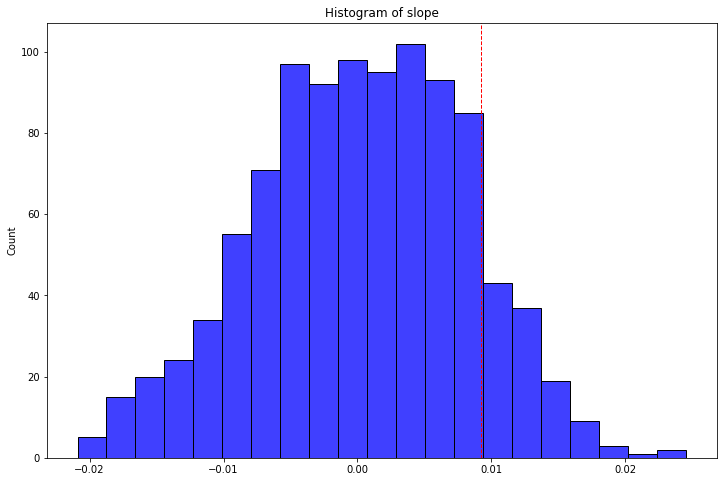

In [166]:
fig = plt.figure(figsize=(12,8))
sns.histplot(null_slope, color="blue")
plt.axvline(obs_slope, color='red', linestyle='dashed', linewidth=1)
plt.title('Histogram of slope')
plt.show()

In [167]:
# 유의확률(p-value) , 대안가설에 따라 양측으로 계산
get_p_value = sum(np.abs(null_slope)>np.abs(obs_slope)) / 1000
print('유의확률 :', get_p_value)

유의확률 : 0.239


Bootstrap을 통한 95% 신뢰구간 측정

In [168]:
np.random.seed(18535)

rep=1000     # Bootstrap 반복수 설정
n = len(kdrama_DW_copy_reg)

ind = range(n)
bs_replicates = []

for i in range(rep):
    # 주어진 자료로부터  임의 복원 추출한 표본(주어진 데이터와 크기 동일)의 index 번호
    randomRows = np.random.choice(ind, size=n)    
    bs_sample = kdrama_DW_copy_reg.iloc[randomRows, :]                # 추출된 표본
    res_model = smf.ols(formula = 'Watchers ~ Duration', data = bs_sample)
    res_result = res_model.fit()
    res_slope = res_result.params[1]
    bs_replicates.append(res_slope)             
    
# bs_replicates      # 1000번 반복하여 계산된 회귀직선의 기울기

In [169]:
print('Bootstrap 95% 신뢰구간:', np.percentile(bs_replicates,[2.5,97.5]) )   # 95% Bootstrap confidence intercal (percentile 방법)

Bootstrap 95% 신뢰구간: [-0.00823362  0.02027671]


- Strength of evidence : 유의성 관련 설명과 유의확률 기술, 신뢰구간 등(해석)

표본에서 계산한 기울기의 값은 0.009이다. 영분포에서 0.009이나 0.009보다 더 극단으로 나올 확률, 즉 위 히스토그램에서 양쪽 면적을 구하여 p-value를 구하면 대략 0.238이 나온다. 

p-value 0.238는 영가설을 반대하는 증거로 매우 약하다.

구한 기울기 95% 신뢰구간 (-0.008, 0.02)는, 드라마 한 회 길이가 1분 길어질수록 드라마 시청자 수는 평균적으로 0.008명 적어질 수도 있고 0.02명 많아질 수도 있음을 의미한다.
(=>시청자 수가 로그화돼서 수치상 파악하기 어렵지만, 회귀적합선 상(𝑦̂  =9.81 + 0.009x)에서 절편값을 크게 바꾸지 못하므로 큰 영향력이 없는 수치라고 유추 가능하다)

즉 p-value와 95% 신뢰구간 모두 드라마 한 회 길이와 시청자 수 사이에 연관성이 없음을 보여준다. 


### Step 5 & 6 : 결론 및 연구의 한계 등 기술

데이터를 처음 요약했을 때 한 회 길이와 시청자 수 간의 상관계수 값은 0.170이었다. 이 값이 얼마나 큰가를 판단하기 위하여 영분포를 모의실험으로 만들어 p-value를 구하였다. p-value값은 0.238로  유의수준 0.05보다 크기 때문에, 두 그룹 사이의 상관관계가 통계적으로 유의하지 않음을 보인다.

선형회귀분석에서도 시청자 수(y)를 로그화하고 이상치 하나를 제거한 데이터에서, 한 회 길이와 시청자 수 간의 회귀직선 기울기 값을 구하니 0.009였다. 마찬가지로 이 값이 얼마나 큰가를 판단하기 위하여 영분포를 모의실험으로 만들어 p-value를 구하였다. p-value값은 0.238로 유의수준 0.05보다 크기 때문에, 두 그룹 사이의 선형관계가 통계적으로 유의하지 않음을 보인다.

결과를 정리하자면 *'한국드라마의 한 회 길이와 시청자 수 사이에는 연관관계가 없다'*고 최종 해석 가능하다.

## 5.분석 결과 요약
:지금까지 분석을 통해 발견한 정보들 요약,정리

####(1)Network와 Rating간의 연관성에서, 
연구과제인 `유통사에 넷플릭스가 포함되어있으면 드라마 평점이 높아지는가?`에 관해

- 영가설 : Netflix 유통 여부와 Rating(평점)은 연관이 없다

- 대안가설 : Network에 Netflix가 포함되어 있다면 평점은 9.0 이상일 것이다

를 세우고 

넷플릭스 여부에 따른 평점 9.0이상 표본비율차이에 대해 모의실험한 결과

p-value를 보면 유의수준 0.05보다 높은 0.116을 기록해 영가설:'넷플릭스 유통 여부와 드라마 평점은 연관이 없다'를 채택하나,

Bootstrap을 통해 구한 95% 신뢰구간이 (-0.089, 0.536)을 보인것을 살펴볼 때

`Netflix를 통해 유통하는것이 약간이나마 9.0이상의 평점을 받는데 도움이 될 수 있음`을 알 수 있었다.

####(2)Network와 Watchers간의 연관성에서, 
연구과제인 `유통사에 넷플릭스가 포함되어있으면 평균 시청자 수가 증가하는가?`에 관해

- 영가설 : 시청자 수는 Netflix 유무에 영향을 받지 않는다.

- 대안가설 : 시청자 수는 Netflix 유무에 영향을 받는다.

를 세우고

넷플릭스 유통 여부에 따른 평균 시청자수 차이에 대해 모의실험한 결과

p-value를 보면 유의수준 0.05보다 높은 0.339을 기록해 영가설 : '시청자 수는 Netflix 유무에 영향을 받지 않는다'를 채택하고,

Bootstrap을 통해 구한 95% 신뢰구간이 (-25236, 6713)을 보인 것을 살펴보면 오히려 넷플릭스를 통해 유통하는 것이 평균 시청자 수 감소의 원인이 될 수 있다고 나왔다.

하지만 Network에 Netflix를 포함한 17개의 kdrama를 살펴보면, Netflix 자체 제작은 단 3개밖에 없고 대부분의 드라마는 한국 방송사들이 Netflix에 추가적으로 유통하는 구조이다. 따라서 Netflix가 시청자 수 감소를 야기한다고 해석하긴 어렵다.

즉, `Netflix를 통해 유통하는 것은 평균 시청자 수에 큰 영향을 주지 않는다.`

#### (3)Duration와 Watchers간의 연관성에서, 
연구과제인 `드라마 한 회 길이가 길수록 시청자 수는 줄어드는가?`에 관해

**In 상관분석**

- 영가설 : 한국드라마의 한 회 길이와 시청자 수 사이에는 상관관계가 없다.

- 대안가설 : 한국드라마의 한 회 길이와 시청자 수 사이에는 상관관계가 있다.

를 세우고

드라마 한 회 길이와 시청자 수 간 상관계수에 대해 모의실험한 결과

p-value를 보면 유의수준 0.05보다 높은 0.238로 영가설 : '한국드라마의 한 회 길이와 시청자 수 사이에는 상관관계가 없다'를 채택한다.

**In 선형회귀분석**

- 영가설 : 한국드라마의 한 회 길이와 시청자 수 사이에는 선형관계가 없다.

- 대안가설 : 한국드라마의 한 회 길이와 시청자 수 사이에는 선형관계가 있다.

를 세우고

드라마 한 회 길이와 시청자 수 간 기울기에 대해 모의실험한 결과


p-value를 보면 유의수준 0.05보다 높은 0.238로 영가설 : '한국드라마의 한 회 길이와 시청자 수 사이에는 선형관계가 없다'를 채택하고,

Bootstrap을 통해 구한 95% 신뢰구간이 (-0.008, 0.02)을 보였다.

즉, `한국드라마의 한 회 길이와 시청자 수 사이에는 연관관계가 없다`고 최종 해석 가능하다.

